In [18]:
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# This extracts the log information for processing
def extract_metric_series(log_file_path):
    metric_dict = defaultdict(list)

    with open(log_file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()

            if line.startswith("{") and line.endswith("}"):
                try:
                    data = ast.literal_eval(line)
                    if isinstance(data, dict) and "loss" in data:
                        for key, value in data.items():
                            metric_dict[key].append(value)
                except Exception:
                    continue

    return dict(metric_dict)

In [22]:
# Get metrics
log_file = "Training Results\\Metrics\\wim_zeta1.0_output.txt"
metrics_over_time = extract_metric_series(log_file)

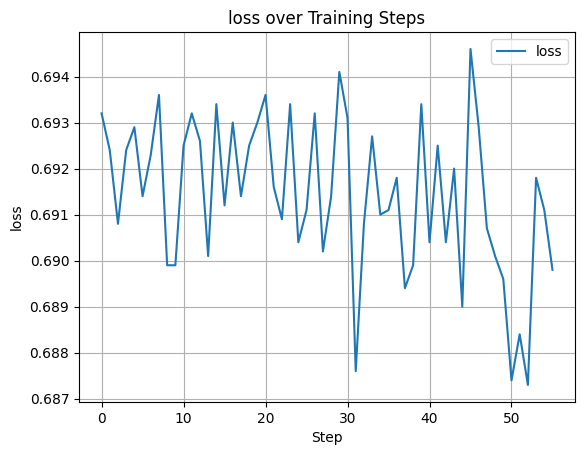

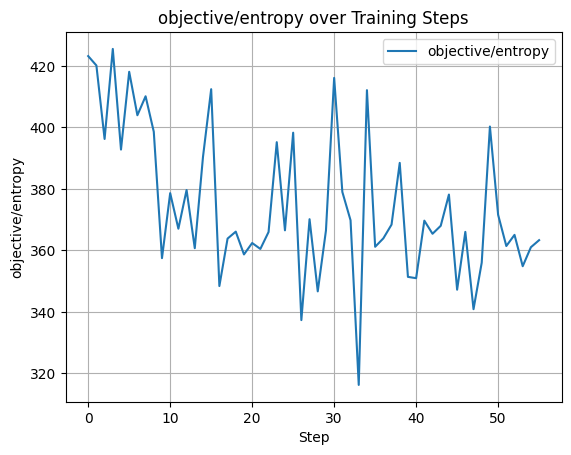

In [ ]:
wanted_metrics = set()
wanted_metrics.add('loss')
wanted_metrics.add('objective/entropy')

for metric in metrics_over_time:
    if metric in wanted_metrics:
        metric_list = metrics_over_time[metric]
        steps = list(range(len(metric_list)))

        plt.figure()
        plt.plot(steps, metric_list, label=metric)
        plt.xlabel('Step')
        plt.ylabel(metric)
        plt.title(metric + ' over Training Steps')
        plt.grid(True)
        plt.show()